# Basic model introduction

This page introduces the processes for building and running a simple compartmental disease model with summer.
In the following example, we will create an SIR compartmental model for a general, unspecified emerging infectious disease spreading through a fully susceptible population. In this model there will be:

- three compartments: susceptible (S), infected (I) and recovered (R)
- a starting population of 1000 people, with 10 of them infected (and infectious)
- an evaluation timespan from day zero to 20 in 0.1 day steps
- inter-compartmental flows for infection, deaths and recovery

First, let's import the summer library and create a new [CompartmentalModel](/api/model.html) object.

In [1]:
from summer import CompartmentalModel

model = CompartmentalModel(
    times=[0, 20],
    compartments=["S", "I", "R"],
    infectious_compartments=["I"],
    timestep=0.1,
)

# View a description of the model compartments
model.compartments

[S, I, R]

## Adding a population 

Initially the model compartments are all empty. Let's add:

- 990 people to the susceptible (S) compartment, plus
- 10 in the infectious (I) compartment.

In [11]:
# Add people to the model
model.set_initial_population(distribution={"S": 990, "I": 10})

# View the initial population
model.initial_population

array([0.00, 0.10, 0.19, 0.29, 0.38, 0.48, 0.57, 0.67, 0.77, 0.86, 0.96,
       1.05, 1.15, 1.24, 1.34, 1.44, 1.53, 1.63, 1.72, 1.82, 1.91, 2.01,
       2.11, 2.20, 2.30, 2.39, 2.49, 2.58, 2.68, 2.78, 2.87, 2.97, 3.06,
       3.16, 3.25, 3.35, 3.44, 3.54, 3.64, 3.73, 3.83, 3.92, 4.02, 4.11,
       4.21, 4.31, 4.40, 4.50, 4.59, 4.69, 4.78, 4.88, 4.98, 5.07, 5.17,
       5.26, 5.36, 5.45, 5.55, 5.65, 5.74, 5.84, 5.93, 6.03, 6.12, 6.22,
       6.32, 6.41, 6.51, 6.60, 6.70, 6.79, 6.89, 6.99, 7.08, 7.18, 7.27,
       7.37, 7.46, 7.56, 7.66, 7.75, 7.85, 7.94, 8.04, 8.13, 8.23, 8.33,
       8.42, 8.52, 8.61, 8.71, 8.80, 8.90, 9.00, 9.09, 9.19, 9.28, 9.38,
       9.47, 9.57, 9.67, 9.76, 9.86, 9.95, 10.05, 10.14, 10.24, 10.33,
       10.43, 10.53, 10.62, 10.72, 10.81, 10.91, 11.00, 11.10, 11.20,
       11.29, 11.39, 11.48, 11.58, 11.67, 11.77, 11.87, 11.96, 12.06,
       12.15, 12.25, 12.34, 12.44, 12.54, 12.63, 12.73, 12.82, 12.92,
       13.01, 13.11, 13.21, 13.30, 13.40, 13.49, 13.59, 13.68,

## Adding intercompartmental flows 

Now, let's add some flows for people to transition between the compartments. These flows will define the dynamics of our infection. We will add:

- an infection flow from S to I (using frequency-dependent transmission)
- a recovery flow from I to R
- an infection death flow, that depletes people from the I compartment

In [3]:
# Susceptible people can get infected.
model.add_infection_frequency_flow(name="infection", contact_rate=1, source="S", dest="I")

# Infectious people take 3 days, on average, to recover.
model.add_sojourn_flow(name="recovery", sojourn_time=3, source="I", dest="R")
# (If the model was run at this stage of construction, the basic reproduction number of this infection would be 6.)

# Add an infection-specific death flow to the I compartment.
model.add_death_flow(name="infection_death", death_rate=0.05, source="I")
# (Note that this now slightly reduces the actual sojourn time in the I compartment from the original request of 3 days, 
# and so slightly reduces the basic reproduction number as well.)

# Inspect new flows.
model._flows

[<InfectionFrequencyFlow 'infection' from S to I>,
 <SojournFlow 'recovery' from I to R>,
 <DeathFlow 'infection_death' from I>]

## Running the model

Now we can calculate the outputs for the model over the requested time period. 
The model calculates the compartment sizes by solving a system of differential equations (defined by the flows we just added) over the requested time period.

In [4]:
model.run()

## Print the model outputs

The model's results are available in a NumPy array named `model.outputs`. 
This array is available after the model has been run. Let's have a look at what's inside:

In [9]:
# Force NumPy to format the output array nicely. 
import numpy as np
np.set_printoptions(formatter={'all': lambda f: f"{f:0.2f}"})

# View the first 25 timesteps of the output array.
model.outputs[:25]

array([[990.00, 10.00, 0.00],
       [989.03, 10.60, 0.33],
       [987.99, 11.23, 0.68],
       [986.90, 11.90, 1.05],
       [985.74, 12.60, 1.44],
       [984.52, 13.35, 1.85],
       [983.23, 14.14, 2.29],
       [981.86, 14.98, 2.75],
       [980.41, 15.86, 3.24],
       [978.88, 16.79, 3.76],
       [977.26, 17.78, 4.32],
       [975.55, 18.82, 4.90],
       [973.74, 19.91, 5.52],
       [971.83, 21.07, 6.17],
       [969.82, 22.29, 6.86],
       [967.69, 23.58, 7.59],
       [965.44, 24.93, 8.37],
       [963.08, 26.36, 9.18],
       [960.58, 27.87, 10.05],
       [957.94, 29.45, 10.96],
       [955.17, 31.12, 11.93],
       [952.24, 32.86, 12.95],
       [949.17, 34.70, 14.03],
       [945.94, 36.63, 15.16],
       [942.54, 38.65, 16.36]])

## Plot the outputs

You can get a better idea of what is going on inside the model by visualizing how the compartment sizes change over time.

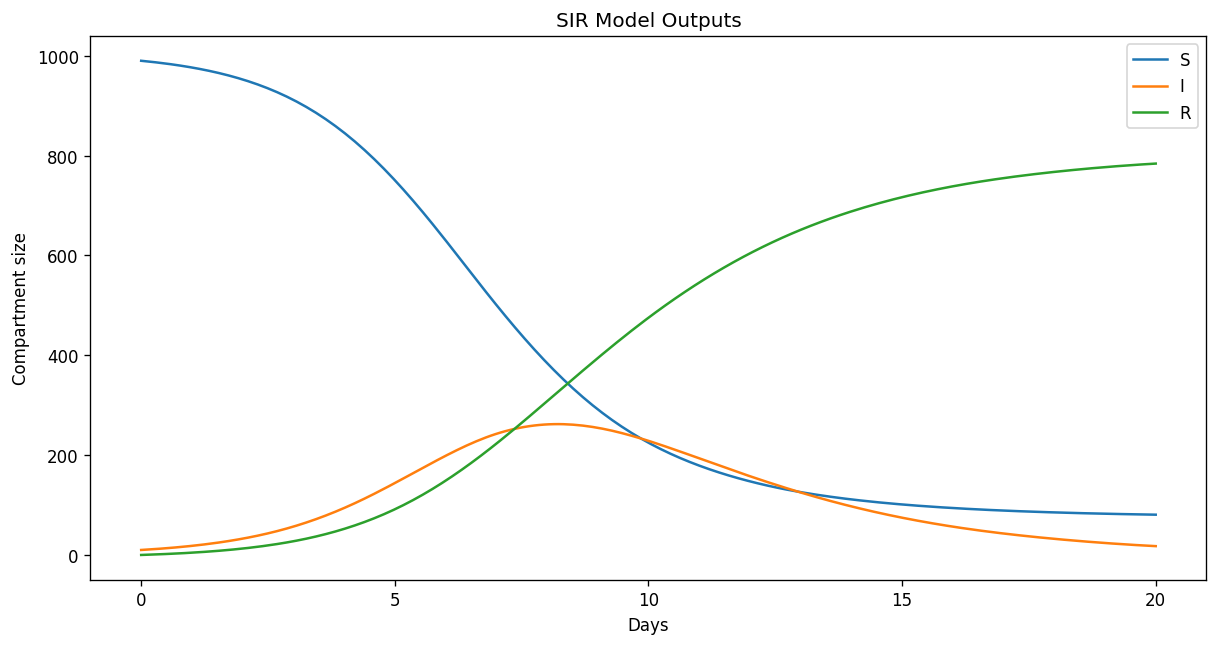

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)

# Add each compartment to the plot.
for i in range(model.outputs.shape[1]):
    ax.plot(model.times, model.outputs.T[i])

ax.set_title("SIR Model Outputs")
ax.set_xlabel("Days")
ax.set_ylabel("Compartment size")
ax.legend(["S", "I", "R"])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start + 1, end, 5))
plt.show()

## Summary

That's it for now, now you know how to:

- Create a model
- Add a population
- Add flows
- Run the model
- Access and visualize the outputs

A detailed API reference for the CompartmentalModel class can be found [here](http://summerepi.com/api/model.html)

## Bonus: how the model works inside

This section presents a code snippet that shows an approximation of what is happening inside the model we just built and ran, (using the [Euler method](https://en.wikipedia.org/wiki/Euler_method) to solve the ODE defined by the model).

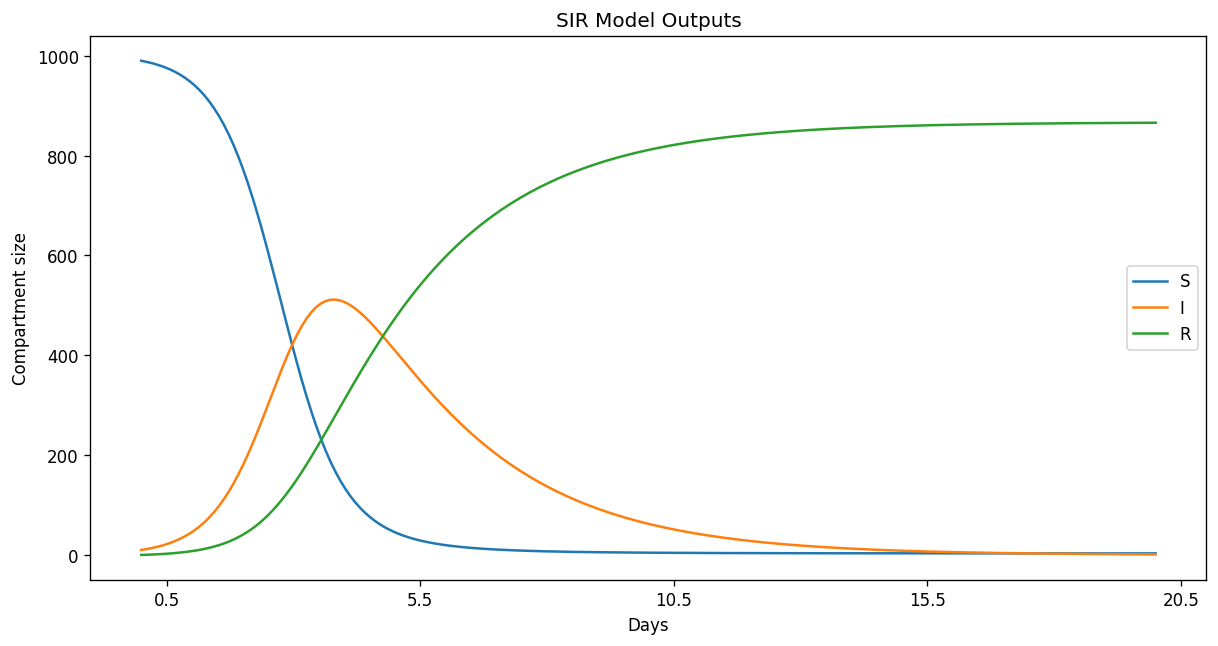

In [7]:
import numpy as np
import matplotlib.pyplot as plt

TIMESTEP = 0.1
START_TIME = 0
END_TIME = 20

# Get times
time_period = END_TIME - START_TIME + 1
num_steps = time_period / TIMESTEP
times = np.linspace(START_TIME, END_TIME, num=int(num_steps))

# Define initial conditions
initial_conditions = np.array([990.0, 10.0, 0.0])  # S, I, R

# Define outputs
outputs = np.zeros((int(num_steps), 3))
outputs[0] = initial_conditions

# Calculate outputs for each timestep
for t_idx, t in enumerate(times):
    if t_idx == 0:
        continue

    flow_rates = np.zeros(3)
    compartment_sizes = outputs[t_idx - 1 ]

    # Susceptible people can get infected (frequency-dependent).
    contact_rate = 2.0
    num_sus = compartment_sizes[0]
    num_inf = compartment_sizes[1]
    num_pop = compartment_sizes.sum()
    force_of_infection = contact_rate * num_inf / num_pop
    infection_flow_rate = force_of_infection * num_sus
    flow_rates[0] -= infection_flow_rate
    flow_rates[1] += infection_flow_rate

    # Infectious people take 3 days, on average, to recover.
    sojourn_time = 3.0
    num_inf = compartment_sizes[1]
    recovery_flow_rate = num_inf / sojourn_time
    flow_rates[1] -= recovery_flow_rate
    flow_rates[2] += recovery_flow_rate
    
    # Add an infection-specific death flow to the I compartment.
    death_rate = 0.05
    num_inf = compartment_sizes[1]
    recovery_flow_rate = num_inf * death_rate
    flow_rates[1] -= recovery_flow_rate
    
    # Calculate compartment sizes at next timestep given flowrates.
    outputs[t_idx] = compartment_sizes + flow_rates * TIMESTEP  
    
# Plot the results as a function of time for S, I, R respectively.
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)

# Add each compartment to the plot.
for i in range(outputs.shape[1]):
    ax.plot(times, outputs.T[i])

ax.set_title("SIR Model Outputs")
ax.set_xlabel("Days")
ax.set_ylabel("Compartment size")
ax.legend(["S", "I", "R"])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start + 1.5, end, 5))
plt.show()